In [ ]:
import pandas as pd
df = pd.read_csv('student-mat.csv')
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


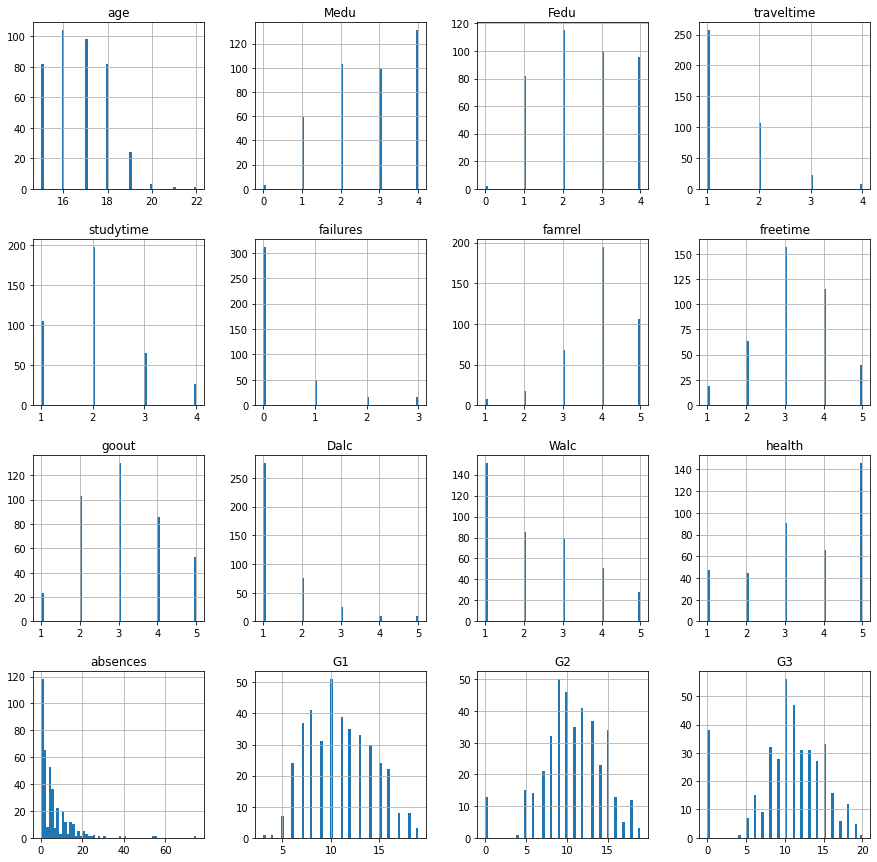

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins = 60, figsize = (15,15))
plt.show()

Text(0.5, 1.0, 'Distribution of Final Grades')

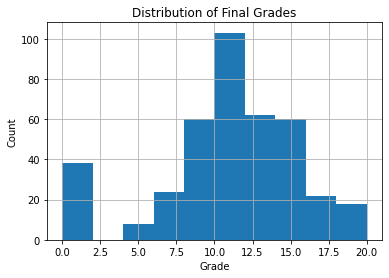

In [ ]:
df.hist('G3')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')

### **A correlation matrix** consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient.Coefficients vary from -1 to 1: the larger the coefficient the greater correlation between features.
### Analyzing the correlation matrix, G3 (Final Grade ) is stongly correlated to G1 and G2 (first and second periods grades).

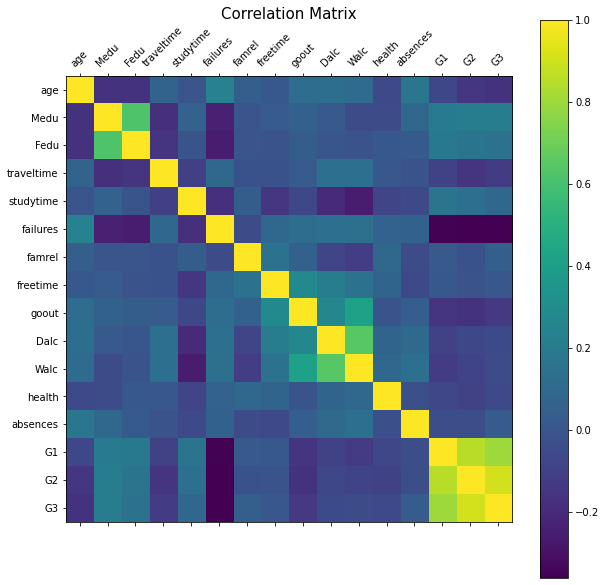

In [ ]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=15,  y=1);

  ### Since some variables are not numerical, One-Hot Encoding is used. The correlations between one-hot encoded dataframe and Final Grade are showed.

In [ ]:
category_df = df.select_dtypes('object')
dummy_df = pd.get_dummies(category_df)
dummy_df['G3'] = df['G3']
dummy_df.head()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,G3
0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,6
1,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,6
2,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,10
3,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,15
4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,10


In [ ]:
dummy_df.corr()['G3'].sort_values()

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

In [ ]:
df = df.drop(['school', 'G1', 'G2'], axis= 1)

In [ ]:
label = df['G3']
df = pd.get_dummies(df)

most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:8]
df = df.loc[:, most_correlated.index]
df = df.drop(columns = 'higher_no')

x_train, x_test, y_train, y_test = train_test_split(df, label, 
                                                        test_size = 0.25)

In [ ]:
formula = 'G3 ~ ' + ' + '.join(str(var) for var in x_train.columns[1:])
formula

'G3 ~ failures + Medu + higher_yes + age + Fedu + goout'

In [ ]:
import pymc3 as pm
with pm.Model() as normal_model:
    family = pm.glm.families.Normal()
    pm.GLM.from_formula(formula, data = x_train, family = family)
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 500, cores=-1)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  """
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd, goout, Fedu, age, higher_yes, Medu, failures, Intercept]


Sampling 2 chains for 500 tune and 2_000 draw iterations (1_000 + 4_000 draws total) took 54 seconds.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc882e522d0>,
      dtype=object)

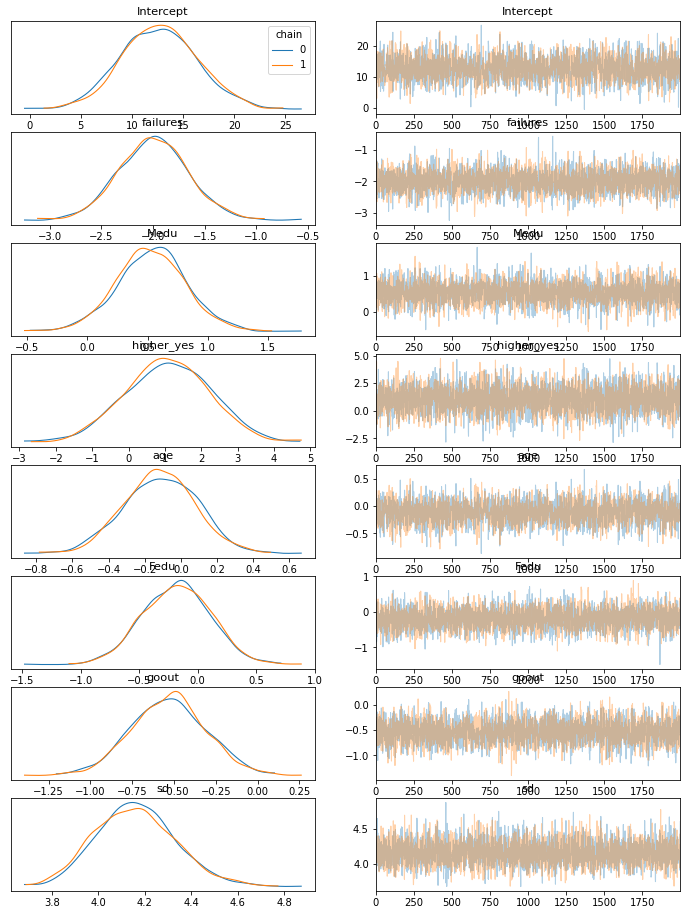

In [ ]:
pm.traceplot(normal_trace, compact=False, legend= True)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc89714eed0>,
      dtype=object)

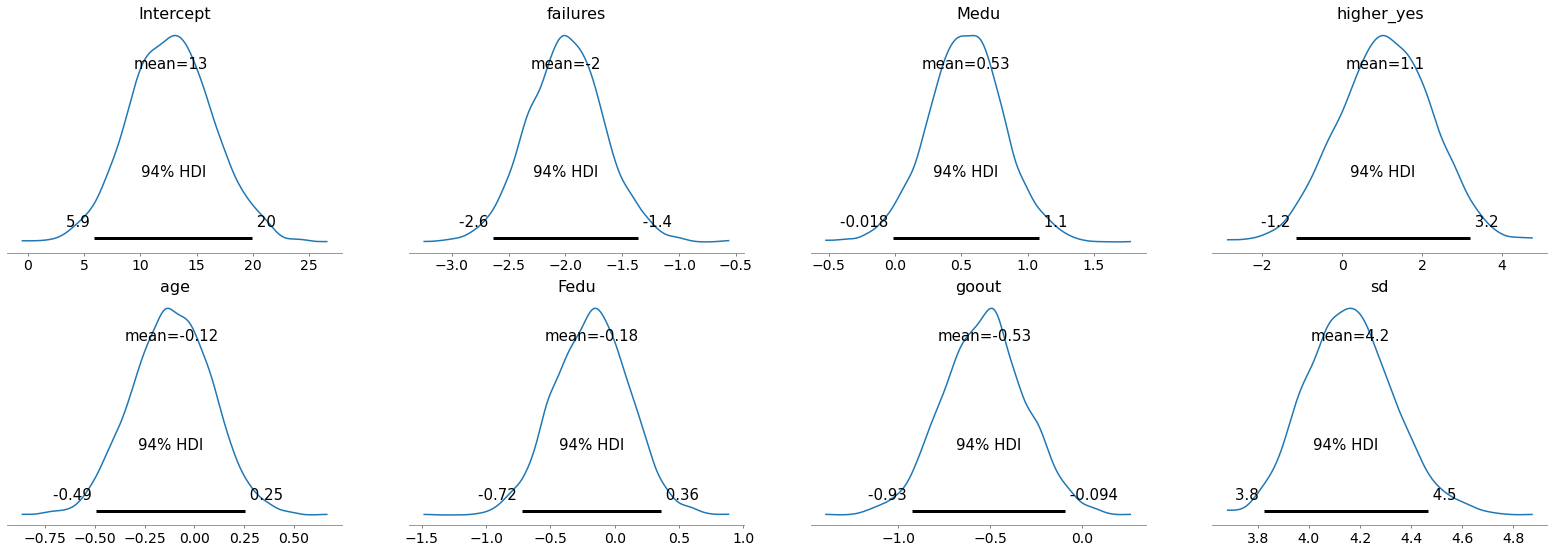

In [ ]:
pm.plot_posterior(normal_trace)

In [ ]:
pm.summary(normal_trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,12.706,3.732,5.878,19.953,0.075,0.053,2498.0,2601.0,1.0
failures,-1.994,0.340,-2.639,-1.361,0.006,0.004,3527.0,2344.0,1.0
Medu,0.531,0.289,-0.018,1.088,0.005,0.004,3151.0,2569.0,1.0
higher_yes,1.081,1.167,-1.164,3.189,0.020,0.016,3552.0,2696.0,1.0
age,-0.115,0.200,-0.493,0.252,0.004,0.003,2980.0,2816.0,1.0
Fedu,-0.181,0.289,-0.722,0.357,0.005,0.004,3173.0,2579.0,1.0
goout,-0.533,0.223,-0.926,-0.094,0.004,0.003,3609.0,2578.0,1.0
sd,4.161,0.171,3.823,4.466,0.003,0.002,3736.0,2242.0,1.0


In [ ]:
import numpy as np
model_formula = 'Grade = '
for variable in normal_trace.varnames:
    model_formula += ' %0.4f * %s +' % (np.mean(normal_trace[variable]), variable)

In [ ]:
model_formula

'Grade =  12.7060 * Intercept + -1.9937 * failures + 0.5314 * Medu + 1.0813 * higher_yes + -0.1152 * age + -0.1809 * Fedu + -0.5331 * goout + 1.4248 * sd_log__ + 4.1607 * sd +'

In [ ]:
var_dict = {}
for variable in normal_trace.varnames:
    var_dict[variable] = normal_trace[variable]
var_weights = pd.DataFrame(var_dict)
var_means = var_weights.mean(axis=0)
x_test['Intercept'] = 1
names = x_test.columns[1:]
x_test = x_test.loc[:, names]
var_means = var_means[names]
results = pd.DataFrame(index = x_test.index, columns = ['estimate'])

for row in x_test.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
    

actual = np.array(y_test)
errors = results['estimate'] - actual
mae = np.mean(abs(errors))
rmse = np.sqrt(np.mean(errors ** 2))

print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))

Model  MAE: 3.5831
Model RMSE: 4.7103


In [452]:
print('Standart deviation :', np.std(np.array(results['estimate']), dtype=np.float64))

Standart deviation : 0.6993640973319795
